### Import Python Modules

In [5]:
import os
import cv2   # Image Processing
import torch # Deep Learning Models
import numpy # Vector / Array Data Structures
import pandas as pd # Read Excel/CSV/Text Files
import matplotlib.pyplot as plt # Visualizing Data

### Load Dataset

In [3]:
dataset = "/Users/krish/Documents/Projects/Datasets/CarObjectDetection"
os.listdir(dataset)

['.DS_Store', 'test', 'train', 'gt.csv']

In [75]:
# Train / Test images
train_images = os.listdir(os.path.join(dataset, 'train'))
test_images = os.listdir(os.path.join(dataset, 'test'))

len(train_images),len(test_images)


(1001, 175)

In [18]:
# Ground Truth
gt_df = pd.read_csv(os.path.join(dataset, 'gt.csv'))
gt_df

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


### Visualize Ground truth

In [65]:
img_name = gt_df.iloc[0].image
image_path = os.path.join(dataset, "train", img_name) 
image = plt.imread(image_path)


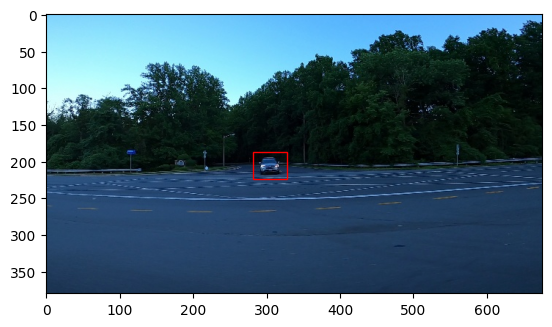

In [73]:
from matplotlib.patches import Rectangle

rect = gt_df[gt_df["image"]==img_name][["xmin","ymin","xmax","ymax"]].values

xmin, ymin, xmax, ymax = rect[0]
plt.imshow(image)
plt.gca().add_patch(Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none'))